In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)


In [5]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

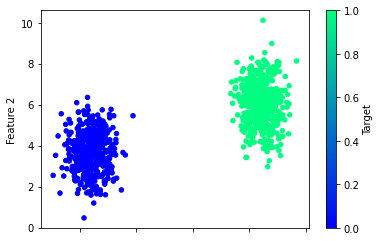

In [6]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [7]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6694 - accuracy: 0.6053
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6253
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6387
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6547
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.6640
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.6720
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.6893
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.7000
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.7133
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7240
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9853
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9867
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9867
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9880
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9880
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9880
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9880
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9880
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9880
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.9893
Epoch 92/100


<AxesSubplot:>

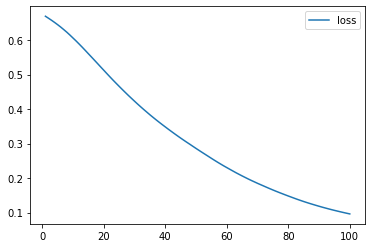

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

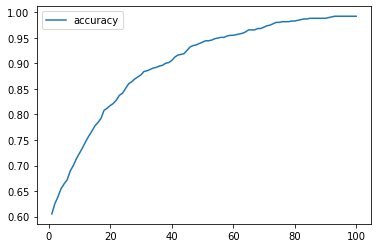

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0877 - accuracy: 1.0000
Loss: 0.08768563717603683, Accuracy: 1.0


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

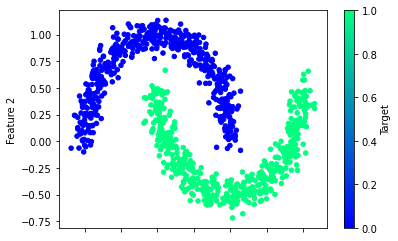

In [27]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [28]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)



In [29]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8613
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8627
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8680
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8693
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8733
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8760
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8787
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8787
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8827
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8827
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8893
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8893
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8907
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8907
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8907
Epoch 93/100


<AxesSubplot:>

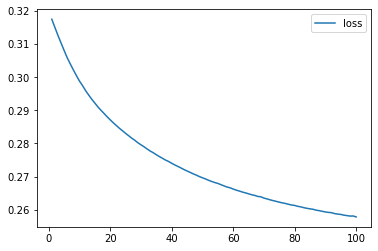

In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

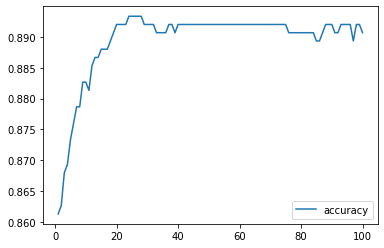

In [31]:
# Plot the loss
history_df.plot(y="accuracy")

In [33]:
# we want to start a new sequential model with 2 inputs as before and 6 neurons in the hidden layer(rule of thumb)
# Generating a new Sequential model
new_model = tf.keras.models.Sequential()

In [35]:
# we will use the dense class to add input,hidden,output layers to our sequential model
# add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add output layer that uses probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [37]:
# we will use our non-linear moon shaped dummy data
# for direct comparison we will use same parameters (training, loss metric, optimizer and number of epochs)

# lets compile sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# lets fit model to training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.4613
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.5387
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.8600
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.8760
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8787
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8840
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8880
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8920
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8907
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8880
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.9067
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9067
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9067
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9093
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9093
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9093
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9093
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9093
Epoch 92/100


#### In the following I will create a new model and experiment with different activation functions to see the accuracy of output

##### will experiment with sigmoid() in hidden layer and tanh() in the output

In [55]:
#Create new model
new_model1 = tf.keras.models.Sequential()

In [56]:
number_inputs = 2
number_hidden_nodes = 6

new_model1.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [57]:
new_model1.add(tf.keras.layers.Dense(units=1, activation="tanh"))

In [58]:
new_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
new_fit_model = new_model1.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 4.3358 - accuracy: 0.2720
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 3.7580 - accuracy: 0.2893
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 2.3977 - accuracy: 0.3160
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0393 - accuracy: 0.3507
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9275 - accuracy: 0.3907
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8634 - accuracy: 0.4040
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8114 - accuracy: 0.4187
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.4373
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7267 - accuracy: 0.4587
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.4760
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2168 - accuracy: 0.9000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9013
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9013
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9013
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9027
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9013
Epoch 93/100
